# Importowanie kodu:

Większość użytecznych programów w języku Python (i ogólnie w każdym języku) korzysta z kodu bibliotecznego. Importowanie do skryptu innych plików z kodem odbywa się poprzez użycie słowa kluczowego **import**.

To jest przykładowy plik z kodem w języku Python przeznaczony do użycia przez inne programy:\
*library.py*

```Python
def add_numbers(a, b):
    return a + b

def split_text(text):
    return text.split()
```

To jest program "główny" importujący funkcjonalności z pliku *library.py*:\
*main.py*

```Python
import library

result = library.add_numbers(2, 3)
print(result)

words = library.split_text("kot pies kanarek")
print(words)
```

#### from <...> import <...>

In [1]:
from library import add_numbers, split_text

result = add_numbers(2, 3)
print(result)

words = split_text("kot pies kanarek")
print(words)

5
['kot', 'pies', 'kanarek']


#### from <...> import *

In [2]:
from library import *

result = add_numbers(2, 3)
print(result)

words = split_text("kot pies kanarek")
print(words)

5
['kot', 'pies', 'kanarek']


#### import <...> as <...>

In [3]:
import library as lb

result = lb.add_numbers(2, 3)
print(result)

words = lb.split_text("kot pies kanarek")
print(words)

5
['kot', 'pies', 'kanarek']


#### from <...> import <...> as <...>

In [4]:
from library import add_numbers as x, split_text as y

result = x(2, 3)
print(result)

words = y("kot pies kanarek")
print(words)

5
['kot', 'pies', 'kanarek']


#### Przykład użycia biblioteki języka Python:

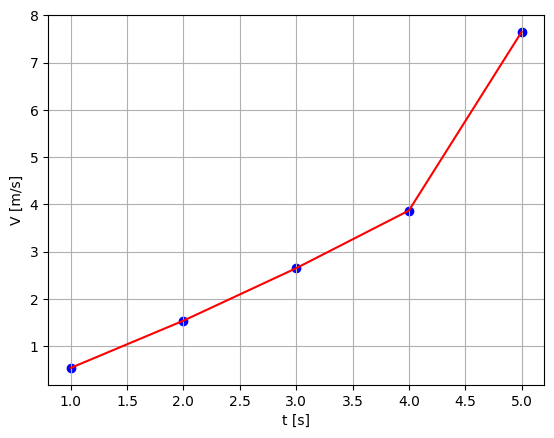

In [5]:
import matplotlib.pyplot as plt

t = [1, 2, 3, 4, 5]
V = [0.54, 1.54, 2.65, 3.87, 7.65]

plt.plot(t, V, color="red")
plt.scatter(t, V, c="blue")
plt.xlabel("t [s]")
plt.ylabel("V [m/s]")
plt.grid()
plt.show()

# Programowanie obiektowe - metody specjalne (c. d.):

#### **__ getitem __:**

In [6]:
class Buffer:
    def __init__(self, data):
        self.data = data

    def __repr__(self):
        return "{}".format(self.data)

    # Metoda specjalna, nadająca zachowanie operatora indeksowania:
    def __getitem__(self, index):
        return self.data[index]


buffer = Buffer([6.54, 3.34, 8.76, 5.43, 2.23])
print(buffer)

# Teraz obiekt klasy Buffer jest indeksowalny
value_1 = buffer[2]
print(value_1)

# Co się stanie po przekroczeniu długości tablicy?
value_3 = buffer[100]
print(value_3)

[6.54, 3.34, 8.76, 5.43, 2.23]
8.76


IndexError: list index out of range

#### **__ setitem __:**

In [7]:
class Buffer:
    def __init__(self, data):
        self.data = data

    def __repr__(self):
        return "{}".format(self.data)

    # Nadanie możliwości przypisania wartości pod indeks
    # z wykorzystaniem operatora indeksowania:
    def __setitem__(self, index, value):
        self.data[index] = value

buffer = Buffer([6.54, 3.34, 8.76, 5.43, 2.23])
print(buffer)

# Umieszczenie 0.0 na początku listy:
buffer[0] = 0.0
print(buffer)

[6.54, 3.34, 8.76, 5.43, 2.23]
[0.0, 3.34, 8.76, 5.43, 2.23]


#### **__ contains __:**

In [8]:
class Buffer:
    def __init__(self, data):
        self.data = data

    def __repr__(self):
        return "{}".format(self.data)

    # Nadanie zachowania słowa kluczowego in:
    def __contains__(self, value):
        return value in self.data

buffer = Buffer([6.54, 3.34, 8.76, 5.43, 2.23])
print(buffer)

# Sprawdzenie czy 3.34 znajduje się w obiekcie klasy Buffer
result = 3.34 in buffer
print(result)

[6.54, 3.34, 8.76, 5.43, 2.23]
True


#### **__ hash __ & __ eq __:**

In [9]:
class Person:
    def __init__(self, name, surname, age):
        self.name = name
        self.surname = surname
        self.age = age

    def __repr__(self):
        return "{} {}, age: {}".format(self.name, self.surname, self.age)


persons = {}

persons[Person("Anna", "Kowalska", 45)] = "kot"
persons[Person("David", "Smith", 32)] = "pies"

# Ponowne wstawienie obiektu Person("David", "Smith", 32)
# nie podmieniło wartości pod już istniejącym kluczem:
persons[Person("David", "Smith", 32)] = "kanarek"

print(persons)

{Anna Kowalska, age: 45: 'kot', David Smith, age: 32: 'pies', David Smith, age: 32: 'kanarek'}


In [10]:
person_a = Person("David", "Smith", 32)
person_b = Person("David", "Smith", 32)

# Problem: mimo, że obiekty mają tą samą wartość, dla Pythona są inne:
print(hash(person_a))
print(hash(person_b))
print(person_a == person_b)

135729886273
135732162826
False


In [11]:
class Person:
    def __init__(self, name, surname, age):
        self.name = name
        self.surname = surname
        self.age = age

    def __repr__(self):
        return "{} {}, age: {}".format(self.name, self.surname, self.age)

    # Zdefiniowanie w jaki sposób ma być liczony hash obiektu klasy Person:
    def __hash__(self):
        return hash((self.name, self.surname, self.age))

    # Zdefiniownie kiedy obiekty klasy Person są sobie równe:
    def __eq__(self, other):
        return (self.name, self.surname, self.age) == (other.name, other.surname, other.age)

persons = {}

persons[Person("Anna", "Kowalska", 45)] = "kot"
persons[Person("David", "Smith", 32)] = "pies"
persons[Person("David", "Smith", 32)] = "kanarek"

print(persons)

{Anna Kowalska, age: 45: 'kot', David Smith, age: 32: 'kanarek'}


#### **__ iter __ & __ next __:**

In [12]:
class Buffer:
    def __init__(self, data):
        self.data = data
        self.index = 0

    # Zdefiniowanie w jaki sposób obiekt klasy Buffer zamienia się w iterator:
    def __iter__(self):
        self.index = 0
        return self

    # Zdefiniowanie w jaki sposób pobierane są kolejne wartości z obiektu klasy Buffer:
    def __next__(self):
        if self.index < len(self.data):
            self.index += 1
            return self.data[self.index - 1]
        else:
            # Zatrzymanie działania iteratora:
            raise StopIteration


buffer = Buffer([5.43, 7.76, 4.32, 9.87, 6.54, 2.21])

for value in buffer:
    print(value)

print("-------- I jeszcze raz:")

for value in buffer:
    print(value)

5.43
7.76
4.32
9.87
6.54
2.21
-------- I jeszcze raz:
5.43
7.76
4.32
9.87
6.54
2.21


# Dziedziczenie:

Dziedziczenie daje możliwość budowania i rozszerzania klas na podstawie innych klas bez potrzeby przepisywania kodu. Dziedziczenie polega na wzięciu klasy bazowej, zbudowaniu na jej podstawie innej klasy i ewentualnym dodaniu do tak powstałej klasy nowych metod, pól, stałych... Klasa bazowa nie jest w żaden sposób zmieniana podczas tej procedury.

In [13]:
# Definicja kalsy bazowej:
class Person:
    def __init__(self, name, surname, age):
        self.name = name
        self.surname = surname
        self.age = age

    def __repr__(self):
        return "{} {}, age: {}".format(self.name, self.surname, self. age)

# Definicja klasy Student, dziedziczącej po klasie Person:
class Student(Person):
    pass


# Zachowania klasy Student jest dokładnie takie samo jak zachowanie klasy Person:
student = Student("Joanna", "Kowalska", 25)
print(student)

Joanna Kowalska, age: 25


In [14]:
# Definicja kalsy bazowej:
class Person:
    def __init__(self, name, surname, age):
        self.name = name
        self.surname = surname
        self.age = age

    def __repr__(self):
        return "{} {}, age: {}".format(self.name, self.surname, self. age)

    def get_name(self):
        return self.name


# Definicja klasy Student, dziedziczącej po klasie Person:
class Student(Person):
    def __init__(self, name, surname, age, grades):
        # Ręczne wywołania inicjalizatora klasy Person:
        Person.__init__(self, name, surname, age)

        # Utworzenie pola w klasie Student:
        self.grades = grades


# Użycie inicjalizatora zdefiniowanego w klasie Student:
student = Student("Joanna", "Kowalska", 25, [5, 4, 3, 5])

# Użycie zachowania klasy bazowej:
print(student)

# Użycie zachowania klasy bazowej:
print(student.get_name())

# Użycie pola zdefiniowanego w klasue Student:
print(student.grades)

Joanna Kowalska, age: 25
Joanna
[5, 4, 3, 5]


# Dziedziczenie i polimorfizm:

In [15]:
# Definicja klasy bazowej:
class Animal:
    # Incjalizator klasy bazowej:
    def __init__(self, name):
        self.name = name

    # Definicja metody get_info:
    def get_info(self):
        print("{}: [generyczna informacja]".format(self.name))


# Klasa Dog dziedzicząca po klasie Animal:
class Dog(Animal):
    # Własna definicja metody get_info
    def get_info(self):
        print("{}: to jest obiekt klasy: Dog".format(self.name))


# Klasa Cat dziedzicząca po klasie Animal:
class Cat(Animal):
    # Własna definicja metody get_info
    def get_info(self):
        print("{}: to jest obiekt klasy: Cat".format(self.name))


animals = [
    Dog("Arthur"),
    Cat("Winston"),
    Animal("Generic name"),
    Dog("Moon Moon")
]

for animal in animals:
    animal.get_info()

Arthur: to jest obiekt klasy: Dog
Winston: to jest obiekt klasy: Cat
Generic name: [generyczna informacja]
Moon Moon: to jest obiekt klasy: Dog


# Ćwiczenia (na zajęcia):

#### 1. W Twoim skrypcie utwórz obiekt klasy Student, zdefiniowanej w pliku *lib_cw1.py*.

#### 2. Zaimportuj bibliotekę **math** (jest to moduł wbudowany), wypisz znajdujące się w niej funkcje i stałe.

#### 3. Przy pomocy funkcji **uniform** z modułu **random**, generujacej liczby losowe, napisz własną funkcję zwracającą listę liczb losowych (float) z zadanego przedziału i o zadanej długości.

```Python
from random import uniform

# Generowanie liczby z rozkładu płaskiego z przedziału 0.0 - 10.0
value = uniform(0.0, 10.0)
```

#### 4. Dodaj możliwość uzyskiwania wartości z obiektów klasy KVdata przy pomocy operatora indeksowania:

```Python
class KVdata:
    def __init__(self, data):
        self.data = data


kvdata = KVdata({"kot": 65, "pies": 12, "kanarek": 87})
value = kvdata["pies"]
print(value)
```

#### 5. Zmodyfikuj definicję klasy DataBucket tak, aby jej obiekty były iterowalne:

```Python
class DataBucket:
    def __init__(self, data):
        self.data = data

data_a = DataBucket([1, 6, 4, 2, 7])
data_b = DataBucket("Text")
data_c = DataBucket(("kot", "pies", "kanarek"))

for value in data_a:
    print(value)

print("---------")

for value in data_b:
    print(value)

print("---------")

for value in data_c:
    print(value)
```

#### 6. Zmodyfikuj definicję klasy Vec2D tak, aby obiekty tej klasy mogły być kluczami słownika:

```Python
class Vec2D:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __repr__(self):
        return "[{}, {}]".format(self.x, self.y)


data = {}

data[Vec2D(1, 2)] = "A"
data[Vec2D(3, 5)] = "B"
data[Vec2D(1, 2)] = "C"

print(data)
```

#### 7. Co będzie wynikiem działania poniższego kodu?

```Python
import urllib

url = "https://pl.wikipedia.org/wiki/Python"

response = urllib.request.urlopen(url)
html_content = response.read()
content = html_content.decode("utf-8")

print(content)
```

#### 8. Wykorzystując moduł **pickle** zapisz do pliku poniższą strukturę danych, wczytaj ją z pliku a na końcu wypisz.

```Python
data = [
    {"a": 7.65, "b": 321},
    [1, 2, 3, 4, 5],
    "kanarek"
]
```

Podpowiedź:
```Python
import pickle

# Zrzucenie danych do formy binarnej:
blob = pickle.dumps(data)

# Załadowanie danych z formy binarnej:
data = pickle.loads(blob)
```

#### 9. Zdefiniuj metodę __ repr __ kalsy Student tak, aby zwracała ona reprezentację zawierającą informację o ocenach:

```Python
class Person:
    def __init__(self, name, surname, age):
        self.name = name
        self.surname = surname
        self.age = age

    def __repr__(self):
        return "{} {}, age: {}".format(self.name, self.surname, self. age)


class Student(Person):
    def __init__(self, name, surname, age, grades):
        Person.__init__(self, name, surname, age)
        self.grades = grades


student = Student("Joanna", "Kowalska", 22, [5, 3, 4, 5])
print(student)
```

#### 10. Przy pomocy funkcjonalności z modułu **time** zmierz jak dużo czasu potrzeba na wykonanie się funkcji **job**:

```Python
import random

def job():
    buffer = [random.uniform(0.0, 10.0) for _ in range(1000000)]
    buffer.sort()
    return buffer[-1]
```

Podpowiedź:

```Python
import time

# Uzyskiwanie odczytu zegara systemowego:
a = time.time()

b = time.time()

# Uzyskiwanie różnicy czasu pomiędzy dwoma pomiarami:
delta = b - a
```

# **Zadania:**

#### Zadanie 1:

Uzupełnij definicję klasy KVdata:

```Python
class KVdata:
    def __init__(self, data):
        # self.data zawsze będzie słownikiem (dict)
        self.data = data

    def __getitem__(self, key):
        # metoda __getitem__ powina zwracać wartość z self.data
        # dla zadanego klucza

    def __iter__(self):
        # metoda __iter__ powinna przygotować obiekt klasy KVdata
        # do iteracji (index?)

    def __next__(self):
        # metoda __next__ powinna zwracać kolejne pary: klucz - wartość
        # w postaci krotek

    def __contains__(self, key):
        # metoda __contains__ powinna zwracać True|False w zależności
        # od tego czy zadany klucz znajduje się w słowniku self.data
```

#### Zadanie 2:

Zaimplementuje metody __ hash __ i __ eq __ dla klasy DataBucket. Sprawdź czy obiekty klasy DataBucket zachowują się poprawnie będąc kluczmi słownika.

```Python
class DataBucket:
    def __init__(self, a, b):
        # self.a zawsze jest krotką zawierającą typy proste (int, float, str)
        self.a = a

        # self.b zawsze jest napisem (str)
        self.b = b
```

#### Zadanie 3:

Napisz program-zgadywankę, który losuje liczbę całkowitą z przedziału 0 - 100 (nie pokazuje jej). Zadaniem użytkownika jest zgadnięcie tej liczby (program powinien prosić o podanie liczby i wczytać ją przy pomocy funkcji wbudowanej **input**). Program powinien podpowiadać jeśli podana liczba jest za duż lub za mała. Zabawa kończy się kiedy użytkowik zgadnie liczbę.

Podowiedź:\
Do generowania liczby użyj funkcji z modułu **random**: **randint**.

#### Zadanie 4:

Sprawdź która z poniższych funkcji (**a** czy **b**) wykona się szybciej. Obie funkcje przyjmują jako argument zmienną **buffer**.

```Python
import random

buffer = [random.uniform(0.0, 10.0) for _ in range(1000000)]


def a(buffer):
    return [x ** 2 for x in buffer]


def b(buffer):
    new_buffer = []

    for x in buffer:
        new_buffer.append(x ** 2)

    return new_buffer
```

Podpowiedź:\
Wykorzystaj funkcjinalności z modułu **time**.

#### Zadanie 5:

Napisz mini-bibliotekę *"lib_zad5"* zawierającą funkcję:
- wyznaczającą długość pomiędzy dwoma punktami w przestrzeni dwuwymiarowej,
- wyznaczającą n-ty wyraz ciągu Fibonacciego,
- zwracającą zmiennoprzecinkową liczbę losową z podanego zakresu.

Przetestuj działanie biblioteki.

#### Zadanie 6*:

Napisz definicję klasy **RandomBuffer**, dziedziczącej po klasie **Random**. Klasa powinna mieć funkcję służącą do generowania listy liczb losowych (**get_random_buffer**) w zadanym zakresie i o zadanej długości.

```Python
import random

class Random:
    def __init__(self):
        pass

    def get_random_number(self, lower_bound, upper_bound):
        return random.uniform(lower_bound, upper_bound)
```